<a href="https://colab.research.google.com/github/Tendo4/Car-Insurance-Cirrhosis/blob/main/Tendo_Elisha_Project_2_part_2_core%2C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Car Insurance Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import BaggingRegressor # NEW
from sklearn import set_config
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from pandas.core.base import value_counts
set_config(transform_output='pandas')

In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## Loading data about car insurance
fpath ="/content/drive/MyDrive/CodingDojo/02-IntroML/Week07/Data/Car_Insurance_Claim.csv"
df = pd.read_csv(fpath)
df

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,323164,26-39,female,majority,10-19y,university,upper class,0.582787,1.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,1,0.0
9996,910346,26-39,female,majority,10-19y,none,middle class,0.522231,1.0,after 2015,0.0,1.0,32765,NaN,sedan,1,0,0,0.0
9997,468409,26-39,male,majority,0-9y,high school,middle class,0.470940,1.0,before 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,0.0
9998,903459,26-39,female,majority,10-19y,high school,poverty,0.364185,0.0,before 2015,0.0,1.0,10238,13000.0,sedan,2,0,1,1.0


In [ ]:
df.shape

(10000, 19)

-The dataset is sourced from https://www.kaggle.com/datasets/sagnik1511/car-insurance-data

-The data is about the annual insurance data of the company

-The target is outcome

-One row represents a person

-This is a classification problem

-It has 10000 rows

-It has 19 columns

##Data Cleaning

In [ ]:
##datatypes
df.dtypes

ID                       int64
AGE                     object
GENDER                  object
RACE                    object
DRIVING_EXPERIENCE      object
EDUCATION               object
INCOME                  object
CREDIT_SCORE           float64
VEHICLE_OWNERSHIP      float64
VEHICLE_YEAR            object
MARRIED                float64
CHILDREN               float64
POSTAL_CODE              int64
ANNUAL_MILEAGE         float64
VEHICLE_TYPE            object
SPEEDING_VIOLATIONS      int64
DUIS                     int64
PAST_ACCIDENTS           int64
OUTCOME                float64
dtype: object

####Duplicates

In [ ]:
#checking for duplicates
duplicated_rows=df.duplicated()
duplicated_rows.sum()

0

####Missing values

In [ ]:
#identifying missing values
null=df.isna()
null_sum=null.sum()
null_sum

ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

In [ ]:
# Use .select_dtypes to view only object columns
cat_cols=df.select_dtypes(include='object')
cat_cols

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_YEAR,VEHICLE_TYPE
0,65+,female,majority,0-9y,high school,upper class,after 2015,sedan
1,16-25,male,majority,0-9y,none,poverty,before 2015,sedan
2,16-25,female,majority,0-9y,high school,working class,before 2015,sedan
3,16-25,male,majority,0-9y,university,working class,before 2015,sedan
4,26-39,male,majority,10-19y,none,working class,before 2015,sedan
...,...,...,...,...,...,...,...,...
9995,26-39,female,majority,10-19y,university,upper class,before 2015,sedan
9996,26-39,female,majority,10-19y,none,middle class,after 2015,sedan
9997,26-39,male,majority,0-9y,high school,middle class,before 2015,sedan
9998,26-39,female,majority,10-19y,high school,poverty,before 2015,sedan


In [ ]:
# Check the nunique for just the object cols inorder to identify columns tha need to be dropped
cat_cols.nunique()

AGE                   4
GENDER                2
RACE                  2
DRIVING_EXPERIENCE    4
EDUCATION             3
INCOME                4
VEHICLE_YEAR          2
VEHICLE_TYPE          2
dtype: int64

In [ ]:
# Use .select_dtypes to view only object columns
num_cols=df.select_dtypes(include='number')
num_cols

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,0.629027,1.0,0.0,1.0,10238,12000.0,0,0,0,0.0
1,750365,0.357757,0.0,0.0,0.0,10238,16000.0,0,0,0,1.0
2,199901,0.493146,1.0,0.0,0.0,10238,11000.0,0,0,0,0.0
3,478866,0.206013,1.0,0.0,1.0,32765,11000.0,0,0,0,0.0
4,731664,0.388366,1.0,0.0,0.0,32765,12000.0,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,323164,0.582787,1.0,0.0,0.0,10238,16000.0,0,0,1,0.0
9996,910346,0.522231,1.0,0.0,1.0,32765,NaN,1,0,0,0.0
9997,468409,0.470940,1.0,0.0,1.0,10238,14000.0,0,0,0,0.0
9998,903459,0.364185,0.0,0.0,1.0,10238,13000.0,2,0,1,1.0


In [ ]:
# Define features (X) and target (y).
y = df['OUTCOME']
X = df.drop(columns='OUTCOME')

In [ ]:
## Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
X_train.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
4901,597605,40-64,male,majority,0-9y,high school,upper class,0.694461,1.0,before 2015,1.0,1.0,92101,NaN,sedan,0,0,0
4375,208394,16-25,female,majority,0-9y,none,poverty,0.295794,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,0,0,0
6698,318837,40-64,male,majority,10-19y,university,upper class,NaN,1.0,before 2015,1.0,1.0,10238,NaN,sedan,0,0,3
9805,559214,26-39,female,majority,10-19y,university,working class,0.454836,1.0,before 2015,0.0,0.0,10238,20000.0,sedan,2,0,0
1101,555274,16-25,female,majority,0-9y,none,poverty,0.152972,1.0,before 2015,1.0,0.0,10238,10000.0,sedan,0,0,0


#### Define groups of features using lists:



In [ ]:
categorical_cols = X_train.select_dtypes('object').columns
categorical_cols

Index(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'VEHICLE_YEAR', 'VEHICLE_TYPE'],
      dtype='object')

In [ ]:
#numerical columns
numeric_cols = X_train.select_dtypes('number').columns
numeric_cols

Index(['ID', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN',
       'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS',
       'PAST_ACCIDENTS'],
      dtype='object')

####imputing categorical columns

In [ ]:
# Instantaite and fit the imputer for categorical features
impute_missing = SimpleImputer(strategy='constant', fill_value='MISSING')
impute_missing.fit(X_train[categorical_cols])

SimpleImputer(fill_value='MISSING', strategy='constant')

In [ ]:
# Transform the training and test categorical features and save as new vars
X_train_cat_imputed = impute_missing.transform(X_train[categorical_cols])
X_test_cat_imputed = impute_missing.transform(X_test[categorical_cols])

# confirm no null values remaining
X_train_cat_imputed.isna().sum()

AGE                   0
GENDER                0
RACE                  0
DRIVING_EXPERIENCE    0
EDUCATION             0
INCOME                0
VEHICLE_YEAR          0
VEHICLE_TYPE          0
dtype: int64

####Imputing numeric columns

In [ ]:
# Instantaite and fit the imputer for numeric features
impute_median = SimpleImputer(strategy='median')
impute_median.fit(X_train[numeric_cols])

SimpleImputer(strategy='median')

In [ ]:
# Transform the training and test numeric features and save as new vars
X_train_num_imputed = impute_median.transform(X_train[numeric_cols])
X_test_num_imputed = impute_median.transform(X_test[numeric_cols])

# confirm no null values remaining
X_train_num_imputed.isna().sum()

ID                     0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
dtype: int64

####Inconsistencies

In [ ]:
for k in cat_cols:
  print(f"Value Counts for {k}")
  print(df[k].value_counts())
  print('\n')

Value Counts for AGE
26-39    3063
40-64    2931
16-25    2016
65+      1990
Name: AGE, dtype: int64


Value Counts for GENDER
female    5010
male      4990
Name: GENDER, dtype: int64


Value Counts for RACE
majority    9012
minority     988
Name: RACE, dtype: int64


Value Counts for DRIVING_EXPERIENCE
0-9y      3530
10-19y    3299
20-29y    2119
30y+      1052
Name: DRIVING_EXPERIENCE, dtype: int64


Value Counts for EDUCATION
high school    4157
university     3928
none           1915
Name: EDUCATION, dtype: int64


Value Counts for INCOME
upper class      4336
middle class     2138
poverty          1814
working class    1712
Name: INCOME, dtype: int64


Value Counts for VEHICLE_YEAR
before 2015    6967
after 2015     3033
Name: VEHICLE_YEAR, dtype: int64


Value Counts for VEHICLE_TYPE
sedan         9523
sports car     477
Name: VEHICLE_TYPE, dtype: int64




####One Hot encoding

In [ ]:
# Instantiate one hot encoder
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [ ]:
# Fit the OneHotEncoder on the training data
ohe_encoder.fit(X_train_cat_imputed)

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [ ]:
# Transform the training data
X_train_cat_encoded = ohe_encoder.transform(X_train_cat_imputed)
X_train_cat_encoded.head()

,AGE_16-25,AGE_26-39,AGE_40-64,AGE_65+,GENDER_female,GENDER_male,RACE_majority,RACE_minority,DRIVING_EXPERIENCE_0-9y,DRIVING_EXPERIENCE_10-19y,...,EDUCATION_none,EDUCATION_university,INCOME_middle class,INCOME_poverty,INCOME_upper class,INCOME_working class,VEHICLE_YEAR_after 2015,VEHICLE_YEAR_before 2015,VEHICLE_TYPE_sedan,VEHICLE_TYPE_sports car
4901,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4375,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
6698,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
9805,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1101,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
# Transform the testing data
X_test_cat_encoded = ohe_encoder.transform(X_test_cat_imputed)
X_test_cat_encoded.head()

,AGE_16-25,AGE_26-39,AGE_40-64,AGE_65+,GENDER_female,GENDER_male,RACE_majority,RACE_minority,DRIVING_EXPERIENCE_0-9y,DRIVING_EXPERIENCE_10-19y,...,EDUCATION_none,EDUCATION_university,INCOME_middle class,INCOME_poverty,INCOME_upper class,INCOME_working class,VEHICLE_YEAR_after 2015,VEHICLE_YEAR_before 2015,VEHICLE_TYPE_sedan,VEHICLE_TYPE_sports car
6252,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4684,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1731,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4742,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4521,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


###Standard scaler for numeric columns

In [ ]:
# instantiate standard scaler and fit on training data
scaler = StandardScaler()
scaler.fit(X_train_num_imputed)

StandardScaler()

In [ ]:
# Apply the scaling transformation
X_train_num_scaled = scaler.transform(X_train_num_imputed)
X_test_num_scaled = scaler.transform(X_test_num_imputed)
X_train_num_scaled.head()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
4901,0.331565,1.367938,0.660062,1.000533,0.674880,3.867776,0.098334,-0.659296,-0.432581,-0.643278
4375,-1.015047,-1.702804,0.660062,-0.999467,-1.481745,0.694321,0.098334,-0.659296,-0.432581,-0.643278
6698,-0.632931,0.063118,0.660062,1.000533,0.674880,-0.510486,0.098334,-0.659296,-0.432581,1.147363
9805,0.198738,-0.477776,0.660062,-0.999467,-1.481745,-0.510486,3.099366,0.229004,-0.432581,-0.643278
1101,0.185106,-2.802891,0.660062,1.000533,-1.481745,-0.510486,-0.651924,-0.659296,-0.432581,-0.643278


In [ ]:
# check describe() for pre-scaling data
X_train_num_imputed.describe().round(2)

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
count,7500.00,7500.00,7500.00,7500.0,7500.00,7500.00,7500.00,7500.00,7500.00,7500.00
mean,501772.84,0.52,0.70,0.5,0.69,19782.86,11737.87,1.48,0.24,1.08
std,289049.11,0.13,0.46,0.5,0.46,18698.85,2665.93,2.25,0.56,1.68
min,101.00,0.06,0.00,0.0,0.00,10238.00,2000.00,0.00,0.00,0.00
25%,253970.75,0.43,0.00,0.0,0.00,10238.00,10000.00,0.00,0.00,0.00
50%,501858.00,0.53,1.00,0.0,1.00,10238.00,12000.00,0.00,0.00,0.00
75%,752031.25,0.61,1.00,1.0,1.00,32765.00,13000.00,2.00,0.00,2.00
max,999976.00,0.96,1.00,1.0,1.00,92101.00,22000.00,22.00,6.00,15.00


In [ ]:
X_train_num_scaled.describe().round(2)

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
count,7500.00,7500.00,7500.00,7500.0,7500.00,7500.00,7500.00,7500.00,7500.00,7500.00
mean,-0.00,0.00,0.00,0.0,-0.00,0.00,-0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.74,-3.51,-1.52,-1.0,-1.48,-0.51,-3.65,-0.66,-0.43,-0.64
25%,-0.86,-0.66,-1.52,-1.0,-1.48,-0.51,-0.65,-0.66,-0.43,-0.64
50%,0.00,0.06,0.66,-1.0,0.67,-0.51,0.10,-0.66,-0.43,-0.64
75%,0.87,0.69,0.66,1.0,0.67,0.69,0.47,0.23,-0.43,0.55
max,1.72,3.42,0.66,1.0,0.67,3.87,3.85,9.11,10.25,8.31


###Categorical and numeric pipelines

In [ ]:
# Prepare Categorical pipeline
cat_cols = X_train.select_dtypes('object').columns

impute_missing = SimpleImputer(strategy='constant',fill_value='MISSING')
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
ohe_pipe = make_pipeline(impute_missing, ohe_encoder)
ohe_pipe

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='MISSING', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [ ]:
# Prepare numeric piepline
num_cols = X_train.select_dtypes('number').columns

mean_imputer = SimpleImputer(strategy="mean")
scaler = StandardScaler()

#Numeric Pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [ ]:
# Making a numeric tuple for ColumnTransformer
num_tuple = ('numeric', numeric_pipe, num_cols)
num_tuple

('numeric',
 Pipeline(steps=[('simpleimputer', SimpleImputer()),
                 ('standardscaler', StandardScaler())]),
 Index(['ID', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN',
        'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS',
        'PAST_ACCIDENTS'],
       dtype='object'))

In [ ]:
# Making a ohe_tuple for ColumnTransformer
ohe_tuple = ('categorical', ohe_pipe, cat_cols)
ohe_tuple

('categorical',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='MISSING', strategy='constant')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 Index(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
        'VEHICLE_YEAR', 'VEHICLE_TYPE'],
       dtype='object'))

In [ ]:
# Instantiate with verbose_feature_names_out=False
col_transformer = ColumnTransformer([num_tuple, ohe_tuple],
                                    verbose_feature_names_out=False)
col_transformer

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['ID', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN',
       'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS',
       'PAST_ACCIDENTS'],
      dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'VEHICLE_YEAR', 'VEHICLE_TYPE'],
      dtype='object'))],
                  verbose_feature_names_out=False)

In [ ]:
# Fit on training data
col_transformer.fit(X_train)

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['ID', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN',
       'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS',
       'PAST_ACCIDENTS'],
      dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'VEHICLE_YEAR', 'VEHICLE_TYPE'],
      dtype='object'))],
                  verbose_feature_names_out=False)

In [ ]:
# Transform the training data
X_train_processed = col_transformer.transform(X_train)
# Transform the testing data
X_test_processed = col_transformer.transform(X_test)
# View the processed training data
X_train_processed.head()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,...,EDUCATION_none,EDUCATION_university,INCOME_middle class,INCOME_poverty,INCOME_upper class,INCOME_working class,VEHICLE_YEAR_after 2015,VEHICLE_YEAR_before 2015,VEHICLE_TYPE_sedan,VEHICLE_TYPE_sports car
4901,0.331565,1.375201,0.660062,1.000533,0.674880,3.867776,6.826978e-16,-0.659296,-0.432581,-0.643278,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4375,-1.015047,-1.696215,0.660062,-0.999467,-1.481745,0.694321,1.085747e-01,-0.659296,-0.432581,-0.643278,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
6698,-0.632931,0.000000,0.660062,1.000533,0.674880,-0.510486,6.826978e-16,-0.659296,-0.432581,1.147363,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
9805,0.198738,-0.470918,0.660062,-0.999467,-1.481745,-0.510486,3.111111e+00,0.229004,-0.432581,-0.643278,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1101,0.185106,-2.796544,0.660062,1.000533,-1.481745,-0.510486,-6.420595e-01,-0.659296,-0.432581,-0.643278,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


###Univariate  visuals

In [ ]:
"""UNIVARIATE PLOTTING FUNCTIONS FOR EDA"""
# Add the print statements to the function
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


# TO DO: add the new print statements from explore_categorical
def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes


# logreg, Random forest /KNN Starts HERE

##KNN

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, RocCurveDisplay
def classification_metrics(y_true, y_pred, label='',
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):
  # Get the classification report
  report = classification_report(y_true, y_pred)
  ## Print header and report
  header = "-"*70
  print(header, f" Classification Metrics: {label}", header, sep='\n')
  print(report)
  ## CONFUSION MATRICES SUBPLOT
  fig, axes = plt.subplots(ncols=2, figsize=figsize)
  # create a confusion matrix  of raw counts
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray',colorbar=colorbar,
                ax = axes[0],);
  axes[0].set_title("Raw Counts")
  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap,colorbar=colorbar,
                ax = axes[1]);
  axes[1].set_title("Normalized Confusion Matrix")
  fig.tight_layout()
  plt.show()
  if output_dict==True:
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    return report_dict
def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
  # Get predictions for training data
  y_train_pred = model.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = model.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )
  if output_dict == True:
    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}
    return results_dict



In [ ]:
# Instantiate default KNN
knn = KNeighborsClassifier()

In [ ]:
# Define KNN model pipeline
knn_pipe = make_pipeline(col_transformer, knn)
# Fit the model on the training data
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['ID', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN',
       'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS',
       'PAST_ACCIDENTS'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipe...leimputer',
                                                                   SimpleImputer(fill_value='MISSING',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'VEHICLE_YEAR', 'VEHICLE_TYPE'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('kneighborsclassifier', KNeighborsClassifier())])

###Evaluate

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90      5144
         1.0       0.80      0.76      0.78      2356

    accuracy                           0.86      7500
   macro avg       0.84      0.84      0.84      7500
weighted avg       0.86      0.86      0.86      7500



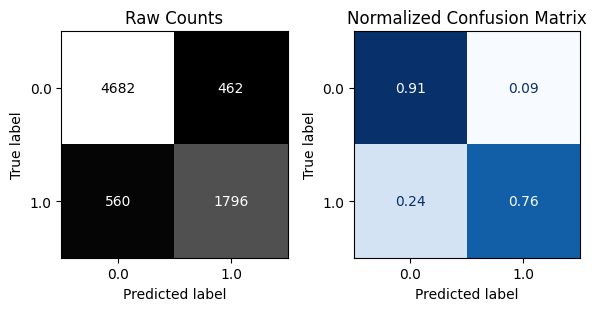


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87      1723
         1.0       0.71      0.69      0.70       777

    accuracy                           0.82      2500
   macro avg       0.79      0.78      0.78      2500
weighted avg       0.82      0.82      0.82      2500



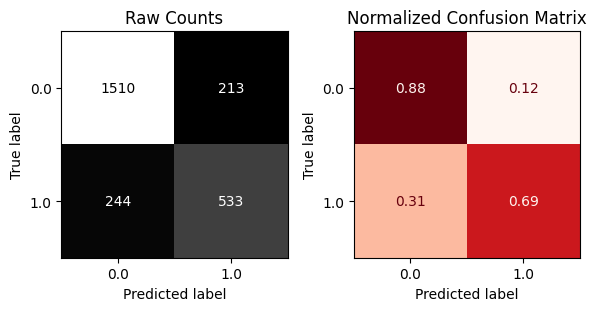

In [ ]:
# Obtain evaluation metrics using custom function
evaluate_classification(knn_pipe, X_train, y_train, X_test, y_test)

###Finding Best K

In [ ]:
# Making every other value from the range (odd values)
nneighbors_list = list(range(1,33,2))
nneighbors_list

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]

In [ ]:
# Get list of params for the knn model pipeline
knn_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    Index(['ID', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN',
          'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS',
          'PAST_ACCIDENTS'],
         dtype='object')),
                                   ('categorical',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(fill_value='MISSING',
                                                                   strategy='constant')),
                                                    ('onehotencoder',
        

In [ ]:
# Create param grid
params={'kneighborsclassifier__n_neighbors': nneighbors_list}

In [ ]:
# Instaniate GridSearchCV
gs = GridSearchCV(knn_pipe, params, verbose=True, n_jobs=-1, scoring='recall_macro',cv=3,)
# Fit gs on training data
gs.fit(X_train, y_train)
# Obtain best param value for K
gs.best_params_

Fitting 3 folds for each of 16 candidates, totalling 48 fits


{'kneighborsclassifier__n_neighbors': 21}

###Logistic Regression

###Logistic Regression

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
def classification_metrics(y_true, y_pred, label="",
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):
  # Get the classification report
  report = classification_report(y_true, y_pred)
  ## Print header and report
  header = "-"*70
  print(header, f" Classification Metrics: {label}", header, sep='\n')
  print(report)
  ## CONFUSION MATRICES SUBPLOTS
  fig, axes = plt.subplots(ncols=2, figsize=figsize)
  # create a confusion matrix  of raw counts
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray', colorbar=colorbar,
                ax = axes[0],);
  axes[0].set_title("Raw Counts")
  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap, colorbar=colorbar,
                ax = axes[1]);
  axes[1].set_title("Normalized Confusion Matrix")
  # Adjust layout and show figure
  fig.tight_layout()
  plt.show()
  # Return dictionary of classification_report
  if output_dict==True:
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    return report_dict



def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
  # Get predictions for training data
  y_train_pred = model.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = model.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )
  if output_dict == True:
    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}
    return results_dict



In [ ]:
# Make an instance of the model with default parameters
logreg = LogisticRegression(max_iter=500, random_state=42)
# Instantiate Standard Scaler because scaling is required for logistic regression
scaler = StandardScaler()
# Put scaler and model in a pipeline
logreg_pipe = make_pipeline(scaler, logreg)
# Training the model on the data, storing the information learned from the data
# Model is learning the relationship between X and y
logreg_pipe.fit(X_train_processed, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(max_iter=500, random_state=42))])

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89      5144
         1.0       0.77      0.72      0.75      2356

    accuracy                           0.84      7500
   macro avg       0.82      0.81      0.82      7500
weighted avg       0.84      0.84      0.84      7500



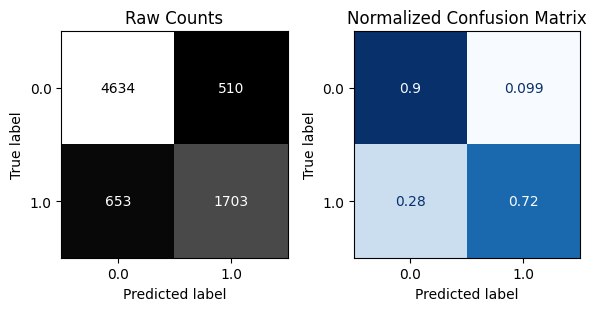


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.87      0.90      0.89      1723
         1.0       0.76      0.71      0.74       777

    accuracy                           0.84      2500
   macro avg       0.82      0.81      0.81      2500
weighted avg       0.84      0.84      0.84      2500



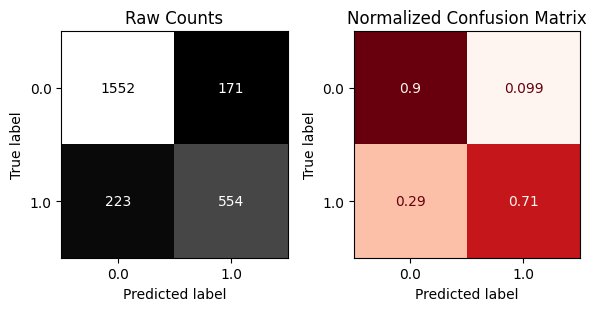

In [ ]:
# Evaluate the default model
evaluate_classification(logreg_pipe, X_train_processed, y_train, X_test_processed, y_test)



###L1 Tunning

In [ ]:
# Create the logreg pipe with L1 regularization
logreg_pipe = make_pipeline(scaler, LogisticRegression(penalty='l1',
                                                       random_state=42,
                                                       max_iter=500))
logreg_pipe.get_params()



{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('logisticregression',
   LogisticRegression(max_iter=500, penalty='l1', random_state=42))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'logisticregression': LogisticRegression(max_iter=500, penalty='l1', random_state=42),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'logisticregression__C': 1.0,
 'logisticregression__class_weight': None,
 'logisticregression__dual': False,
 'logisticregression__fit_intercept': True,
 'logisticregression__intercept_scaling': 1,
 'logisticregression__l1_ratio': None,
 'logisticregression__max_iter': 500,
 'logisticregression__multi_class': 'auto',
 'logisticregression__n_jobs': None,
 'logisticregression__penalty': 'l1',
 'logisticregression__random_state': 42,
 'logisticregression__solver': 'lbfgs',
 'logisticregression__tol': 0.0001,
 'logisticregression__verbose': 0,
 'logisticregression__warm_start': False}

In [ ]:
# Remaking the model with solver='liblinear'
logreg_pipe = make_pipeline(scaler, LogisticRegression(solver='liblinear',
                                                       max_iter=500,
                                                       penalty='l1',
                                                       random_state=42))
# Define the param grid
params={'logisticregression__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
# Create the GridSearchCV object with required args
gs = GridSearchCV(logreg_pipe, params, verbose=True, n_jobs=-1,
                  return_train_score=True,scoring='recall_macro',cv=3)
# Fit the gridsearch and display best params
gs.fit(X_train_processed, y_train)
print(f'Best Params: {gs.best_params_}')

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Params: {'logisticregression__C': 0.1}


In [ ]:
# Making a dataframe with cv_results_
cv_results = pd.DataFrame(gs.cv_results_)
# Save the train/test scores + value for C
scores = cv_results[['param_logisticregression__C','mean_train_score','mean_test_score']]
scores = scores.set_index('param_logisticregression__C')
scores



,mean_train_score,mean_test_score
param_logisticregression__C,,
0.0001,0.500000,0.500000
0.0010,0.758379,0.758377
0.0100,0.805923,0.805331
0.1000,0.813199,0.810904
1.0000,0.812417,0.808021
10.0000,0.812213,0.807923
100.0000,0.812098,0.807826
1000.0000,0.812050,0.807614


param_logisticregression__C
0.0001       0.500000
0.0010       0.758377
0.0100       0.805331
0.1000       0.810904
1.0000       0.808021
10.0000      0.807923
100.0000     0.807826
1000.0000    0.807614
Name: mean_test_score, dtype: float64


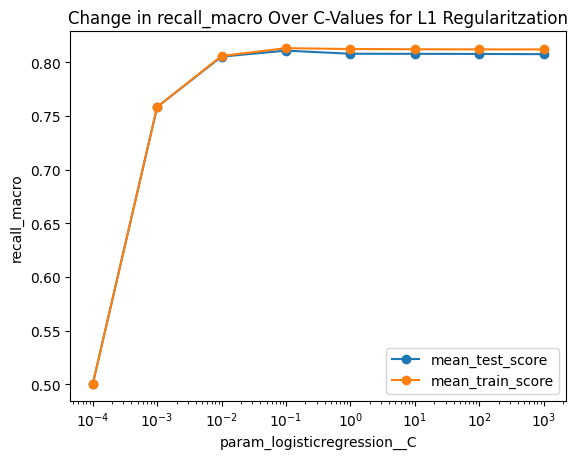

In [ ]:
## Plot the training vs test scores vs. C
ax = scores.plot(y=['mean_test_score','mean_train_score'],
            style='o-',logx=True)
ax.set(ylabel=gs.scoring,
       title=f'Change in {gs.scoring} Over C-Values for L1 Regularitzation')
print(scores['mean_test_score'])



In [ ]:
# We will be reproducing thie plot many times, so let's turn it into a short-term function
def plot_cv_results(gs, param_name='param_logisticregression__C', logx = True):
    # Making a dataframe with cv_results_
  cv_results = pd.DataFrame(gs.cv_results_)
  # Save the train/test scores with values for C
  scores = cv_results[[param_name,'mean_train_score','mean_test_score']]
  scores = scores.set_index(param_name)
  ## Plot the training vs test scores vs. C
  ax = scores.plot(y=['mean_test_score','mean_train_score'],
              style='o-',logx=logx)
  ax.set(ylabel=gs.scoring)
  print(scores['mean_test_score'])
  return ax



param_logisticregression__C
0.0001       0.500000
0.0010       0.758377
0.0100       0.805331
0.1000       0.810904
1.0000       0.808021
10.0000      0.807923
100.0000     0.807826
1000.0000    0.807614
Name: mean_test_score, dtype: float64


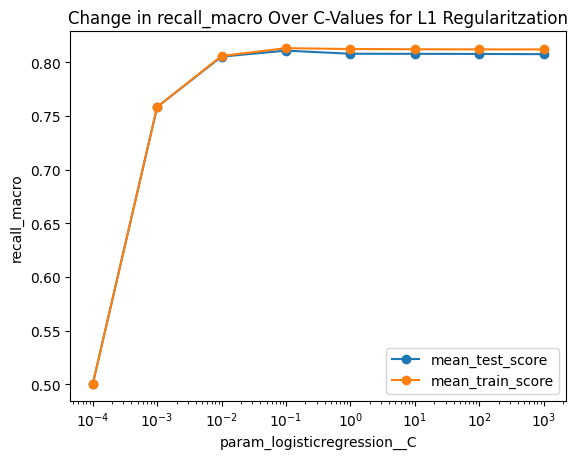

In [ ]:
# Recreating the plot with our new function
ax = plot_cv_results(gs)
ax.set_title(f'Change in {gs.scoring} Over C-Values for L1 Regularitzation');


###L2 Tunning

In [ ]:
# Making a logreg pipe that uses L2 regularization
logreg_pipe = make_pipeline(scaler, LogisticRegression(solver='liblinear',
                                                       max_iter=500,
                                                       penalty='l2',
                                                       random_state=42))
# Define the params and instantiate gridsearch
params={'logisticregression__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
gs = GridSearchCV(logreg_pipe, params,verbose=True, n_jobs=-1,
                  return_train_score=True,scoring='recall_macro',cv=3)
# Fit gridsearch and display best params
gs.fit(X_train_processed, y_train)
gs.best_params_



Fitting 3 folds for each of 8 candidates, totalling 24 fits


{'logisticregression__C': 0.01}

param_logisticregression__C
0.0001       0.791037
0.0010       0.804844
0.0100       0.811924
0.1000       0.809064
1.0000       0.807808
10.0000      0.807826
100.0000     0.807826
1000.0000    0.807826
Name: mean_test_score, dtype: float64


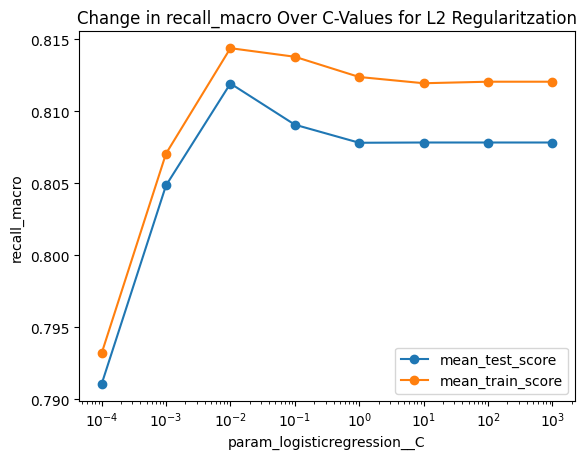

In [ ]:
ax = plot_cv_results(gs)
ax.set_title(f'Change in {gs.scoring} Over C-Values for L2 Regularitzation');


###Elasticnet Regularization

In [ ]:
# Making a logreg pipe that uses elasticnet regularization
logreg_pipe = make_pipeline(scaler, LogisticRegression(solver='saga', penalty='elasticnet', max_iter=2500, random_state=42))
# Define l1_ratio params
params={
    'logisticregression__l1_ratio':[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
    }
# Create and fit the gridsearch and display results
gs = GridSearchCV(logreg_pipe, params,verbose=True, n_jobs=-1,cv=3,
                  return_train_score=True,scoring='recall_macro')
gs.fit(X_train_processed, y_train)
gs.best_params_



Fitting 3 folds for each of 11 candidates, totalling 33 fits


{'logisticregression__l1_ratio': 0.3}

param_logisticregression__l1_ratio
0.0    0.807905
0.1    0.807905
0.2    0.808021
0.3    0.808215
0.4    0.808215
0.5    0.808215
0.6    0.808215
0.7    0.808215
0.8    0.808215
0.9    0.808003
1.0    0.807808
Name: mean_test_score, dtype: float64


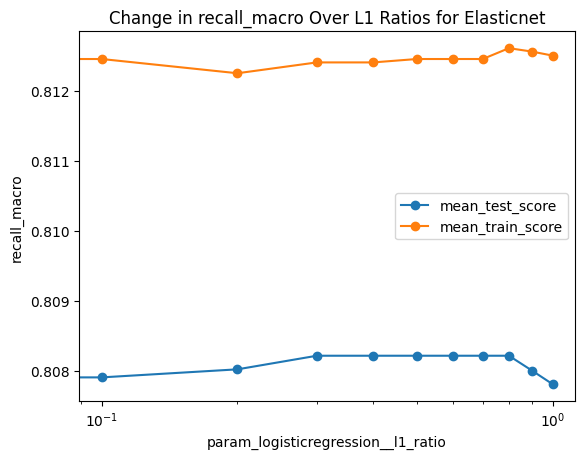

In [ ]:
ax = plot_cv_results(gs, param_name='param_logisticregression__l1_ratio')
ax.set_title(f'Change in {gs.scoring} Over L1 Ratios for Elasticnet');



In [ ]:
# Making a starter logreg pipeline
logreg_pipe = make_pipeline(scaler, LogisticRegression(max_iter=1000,
                                                       random_state=42))



In [ ]:
# Params compatible with penality='elasticnet'
elasticnet_params = {'logisticregression__solver' : ['saga'],
               'logisticregression__penalty' : ['elasticnet'],
                'logisticregression__l1_ratio': [0, 0.1, 0.2, 0.3, 0.4,
                                                 0.5, 0.6, 0.7, 0.8, 0.9, 1]}
# Params compatible with penality='l2'
l2_params = {'logisticregression__solver': ['lbfgs', 'liblinear', 'newton-cg',
                                            'newton-cholesky', 'sag', 'saga'],
                  'logisticregression__penalty' : ['l2'],
                  'logisticregression__C': [0.0001, 0.001, 0.01, 0.1,
                                            1, 10, 100, 1000] }
# Params compatible with penality='l1'
l1_params = {'logisticregression__solver' : ['liblinear', 'saga'],
               'logisticregression__penalty' : ['l1'],
                'logisticregression__C': [0.0001, 0.001, 0.01, 0.1, 1,
                                          10, 100, 1000]}
# Params with no penality
none_params = {'logisticregression__solver' : ['lbfgs', 'newton-cg',
                                               'newton-cholesky', 'sag', 'saga'],
               'logisticregression__penalty' : [None]}
# Now make a list of the param dictionaries
param_grid = [l2_params, l1_params, elasticnet_params, none_params]





In [ ]:
## Warning: this gridsearch may take 5-10 minutes to run!!
# Instantiate gridsearch
gs = GridSearchCV(logreg_pipe, param_grid, verbose = 5, n_jobs = -1,
                  scoring='recall_macro')
# Fit the gs on the training data only
gs.fit(X_train_processed, y_train)
gs.best_params_


Fitting 5 folds for each of 80 candidates, totalling 400 fits


{'logisticregression__C': 0.01,
 'logisticregression__penalty': 'l2',
 'logisticregression__solver': 'liblinear'}

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.88      0.89      0.89      5144
         1.0       0.76      0.74      0.75      2356

    accuracy                           0.84      7500
   macro avg       0.82      0.82      0.82      7500
weighted avg       0.84      0.84      0.84      7500



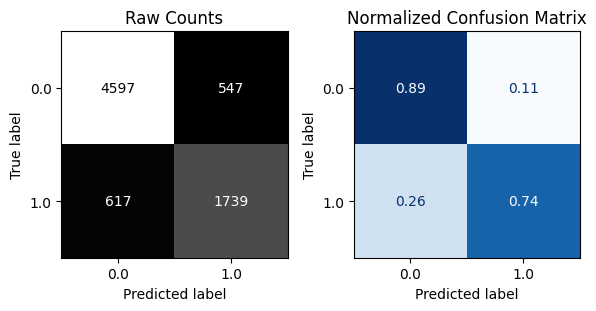


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89      1723
         1.0       0.76      0.72      0.74       777

    accuracy                           0.84      2500
   macro avg       0.82      0.81      0.82      2500
weighted avg       0.84      0.84      0.84      2500



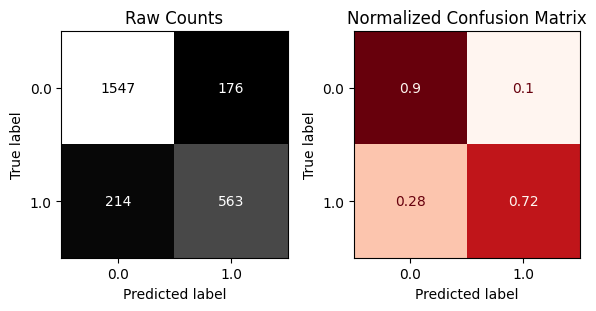

In [ ]:
# Evalaute the best model
best_logreg = gs.best_estimator_
evaluate_classification(best_logreg, X_train_processed, y_train, X_test_processed, y_test)


##Random Forests

In [ ]:
# Instantiate and fit RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_processed, y_train)

# Obtain predictions
train_preds = rf_clf.predict(X_train_processed)
test_preds = rf_clf.predict(X_test_processed)

# Calculate classification accuracy
train_score = accuracy_score(y_train, train_preds)
test_score = accuracy_score(y_test, test_preds)
print (f'The training accuracy is {train_score:.3f}.')
print (f'The testing accuracy is {test_score:.3f}.')

The training accuracy is 1.000.
The testing accuracy is 0.836.


In [ ]:
# Define rf_clf model pipeline
rf_pipe = make_pipeline(col_transformer, rf_clf)
# Fit the model on the training data
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['ID', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN',
       'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS',
       'PAST_ACCIDENTS'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipe...
                                                                   SimpleImputer(fill_value='MISSING',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'VEHICLE_YEAR', 'VEHICLE_TYPE'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5144
         1.0       1.00      1.00      1.00      2356

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500



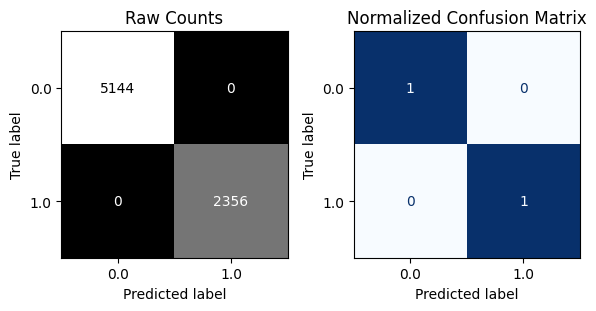


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.86      0.91      0.88      1723
         1.0       0.77      0.68      0.72       777

    accuracy                           0.84      2500
   macro avg       0.81      0.79      0.80      2500
weighted avg       0.83      0.84      0.83      2500



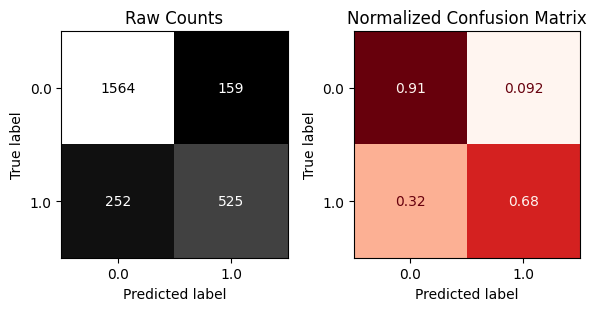

In [ ]:
# Obtain evaluation metrics using custom function
evaluate_classification(rf_pipe, X_train, y_train, X_test, y_test)

In [ ]:
#Get params
rf_clf.get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
#fine tune
fine_tune_params={
    'max_depth':[2,4,8,16,32]
}

In [ ]:
# Instantiate gridsearch
gscv = GridSearchCV(rf_clf, fine_tune_params, verbose = 5, n_jobs = -1,
                  scoring='recall_macro')

In [ ]:
# Fit the gs on the training data only
gscv.fit(X_train_processed, y_train)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 8, 16, 32]},
             scoring='recall_macro', verbose=5)

In [ ]:
#getting the best params
gscv.best_params_

{'max_depth': 8}

In [ ]:
#finding the best model
best_model=gscv.best_estimator_

y_pred=best_model.predict(X_test_processed)

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90      5144
         1.0       0.80      0.75      0.77      2356

    accuracy                           0.86      7500
   macro avg       0.84      0.83      0.84      7500
weighted avg       0.86      0.86      0.86      7500



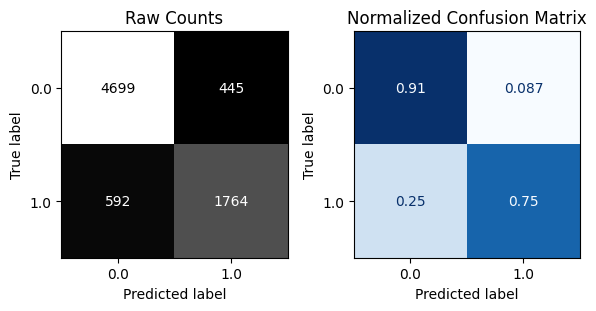


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89      1723
         1.0       0.78      0.71      0.74       777

    accuracy                           0.85      2500
   macro avg       0.82      0.81      0.81      2500
weighted avg       0.84      0.85      0.84      2500



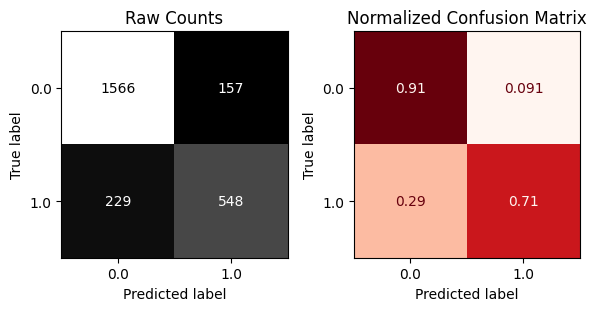

In [ ]:
# Evalaute the best model

evaluate_classification(best_model, X_train_processed, y_train, X_test_processed, y_test)


#Cirrhosis

In [ ]:
# Loading data about cirrhosis
fpath ="/content/drive/MyDrive/CodingDojo/02-IntroML/Week07/Data/cirrhosis.csv"
dfc = pd.read_csv(fpath)
dfc

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


In [ ]:
dfc.shape

(418, 20)

-The data is obtained from the link https://www.kaggle.com/datasets/fedesoriano/cirrhosis-prediction-dataset

-The data is about cirrhosis (Cirrhosis is a late stage of scarring (fibrosis) of the liver caused by many forms of liver diseases and conditions, such as hepatitis and chronic alcoholism)

The following data contains the information collected from the Mayo Clinic trial in primary biliary cirrhosis (PBC) of the liver conducted between 1974 and 1984

-Stage is the target

-Each row represents a person

-This is a Regression problem

-Dataset has 20 features

-Dataset has 418 rows

-Numerical variables with categorical appearance are also included in the categorical variables.



##Data Cleaning

In [ ]:
#dropping the ID
dfc.drop(['ID'], axis=1, inplace=True)

In [ ]:
#converting age to a more appropriate format
dfc['Age'] = (dfc['Age'].values/365).round()

In [ ]:
#datatypes
dfc.dtypes

N_Days             int64
Status            object
Drug              object
Age              float64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage             object
dtype: object

####Converting dtypes

In [ ]:
#convert Stage from numerical to categorical
dfc['Stage'] = dfc['Stage'].astype(object)
print (dfc['Stage'].dtypes)

object


####Duplicates

In [ ]:
#checking for duplicates
duplicated_rows=dfc.duplicated()
duplicated_rows.sum()

0

####Missing values

In [ ]:
#identifying missing values
null=dfc.isna()
null_sum=null.sum()
null_sum

N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [ ]:
# Use .select_dtypes to view only object columns
cat_cols=dfc.select_dtypes(include='object')
cat_cols

,Status,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Stage
0,D,D-penicillamine,F,Y,Y,Y,Y,4.0
1,C,D-penicillamine,F,N,Y,Y,N,3.0
2,D,D-penicillamine,M,N,N,N,S,4.0
3,D,D-penicillamine,F,N,Y,Y,S,4.0
4,CL,Placebo,F,N,Y,Y,N,3.0
...,...,...,...,...,...,...,...,...
413,D,NaN,F,NaN,NaN,NaN,N,3.0
414,C,NaN,F,NaN,NaN,NaN,N,4.0
415,C,NaN,F,NaN,NaN,NaN,N,3.0
416,C,NaN,F,NaN,NaN,NaN,N,3.0


In [ ]:
# Check the nunique for just the object cols inorder to identify columns tha need to be dropped
cat_cols.nunique()

Status          3
Drug            2
Sex             2
Ascites         2
Hepatomegaly    2
Spiders         2
Edema           3
Stage           4
dtype: int64

In [ ]:
# Use .select_dtypes to view only object columns
num_cols=dfc.select_dtypes(include='number')
num_cols

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,400,59.0,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2
1,4500,56.0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6
2,1012,70.0,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0
3,1925,55.0,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3
4,1504,38.0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9
...,...,...,...,...,...,...,...,...,...,...,...
413,681,67.0,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9
414,1103,39.0,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2
415,1055,57.0,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9
416,691,58.0,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4


####Imputation of missing values

In [ ]:
# Define features (X) and target (y).
y = dfc['Stage']
X = dfc.drop(columns='Stage')

In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
X_train.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
132,2796,D,Placebo,63.0,M,N,N,N,N,1.5,331.0,3.95,13.0,577.0,128.65,99.0,165.0,10.1
60,4256,C,Placebo,44.0,M,N,N,N,N,0.6,216.0,3.94,28.0,601.0,60.45,188.0,211.0,13.0
198,1592,C,D-penicillamine,41.0,F,N,N,N,N,2.1,392.0,3.43,52.0,1395.0,184.45,194.0,328.0,10.2
332,1518,D,NaN,56.0,F,NaN,NaN,NaN,N,2.8,NaN,3.92,NaN,NaN,NaN,NaN,NaN,10.6
63,1487,D,Placebo,63.0,F,N,Y,N,N,2.1,373.0,3.50,52.0,1009.0,150.35,188.0,178.0,11.0


#### Define groups of features using lists:



In [ ]:
categorical_cols = X_train.select_dtypes('object').columns
categorical_cols

Index(['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'], dtype='object')

In [ ]:
#numerical columns
numeric_cols = X_train.select_dtypes('number').columns
numeric_cols

Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin'],
      dtype='object')

####imputing categorical columns

In [ ]:
# Instantaite and fit the imputer for categorical features
impute_missing = SimpleImputer(strategy='constant', fill_value='MISSING')
impute_missing.fit(X_train[categorical_cols])

SimpleImputer(fill_value='MISSING', strategy='constant')

In [ ]:
# Transform the training and test categorical features and save as new vars
X_train_cat_imputed = impute_missing.transform(X_train[categorical_cols])
X_test_cat_imputed = impute_missing.transform(X_test[categorical_cols])

# confirm no null values remaining
X_train_cat_imputed.isna().sum()

Status          0
Drug            0
Sex             0
Ascites         0
Hepatomegaly    0
Spiders         0
Edema           0
dtype: int64

####Imputing numeric columns

In [ ]:
# Instantaite and fit the imputer for numeric features
impute_median = SimpleImputer(strategy='median')
impute_median.fit(X_train[numeric_cols])

SimpleImputer(strategy='median')

In [ ]:
# Transform the training and test numeric features and save as new vars
X_train_num_imputed = impute_median.transform(X_train[numeric_cols])
X_test_num_imputed = impute_median.transform(X_test[numeric_cols])

# confirm no null values remaining
X_train_num_imputed.isna().sum()

N_Days           0
Age              0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
dtype: int64

####Inconsistencies

In [ ]:
for t in cat_cols:
  print(f"Value Counts for {t}")
  print(dfc[t].value_counts())
  print('\n')

Value Counts for Status
C     232
D     161
CL     25
Name: Status, dtype: int64


Value Counts for Drug
D-penicillamine    158
Placebo            154
Name: Drug, dtype: int64


Value Counts for Sex
F    374
M     44
Name: Sex, dtype: int64


Value Counts for Ascites
N    288
Y     24
Name: Ascites, dtype: int64


Value Counts for Hepatomegaly
Y    160
N    152
Name: Hepatomegaly, dtype: int64


Value Counts for Spiders
N    222
Y     90
Name: Spiders, dtype: int64


Value Counts for Edema
N    354
S     44
Y     20
Name: Edema, dtype: int64


Value Counts for Stage
3.0    155
4.0    144
2.0     92
1.0     21
Name: Stage, dtype: int64




####Univariate

In [ ]:
def num_s(dataframe, numeric_col, plot=False):
    quantiles = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    print(dataframe[numeric_col].describe(quantiles).T)

    if plot:
        dataframe[numeric_col].hist()
        plt.xlabel(numeric_col)
        plt.title(numeric_col)
        plt.interactive(False)
        plt.show(block=True)

count     418.000000
mean     1917.782297
std      1104.672992
min        41.000000
5%        245.100000
10%       606.800000
20%       974.800000
30%      1217.600000
40%      1434.800000
50%      1730.000000
60%      2107.000000
70%      2465.000000
80%      2851.800000
90%      3524.200000
max      4795.000000
Name: N_Days, dtype: float64


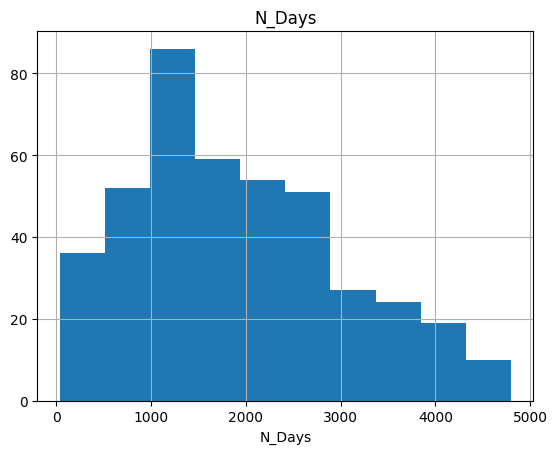

count    418.000000
mean      50.772727
std       10.442880
min       26.000000
5%        34.000000
10%       36.700000
20%       41.000000
30%       45.000000
40%       48.000000
50%       51.000000
60%       54.000000
70%       56.000000
80%       61.000000
90%       64.300000
max       78.000000
Name: Age, dtype: float64


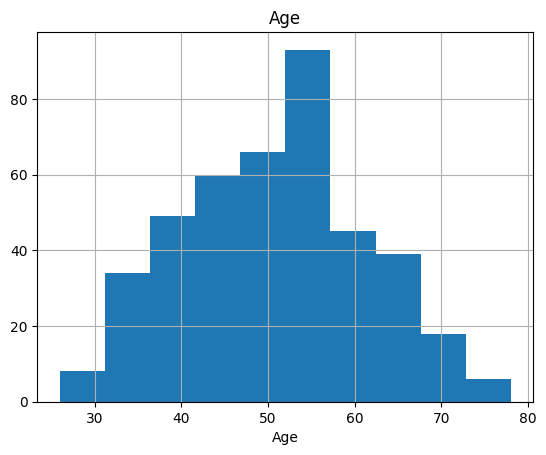

count    418.000000
mean       3.220813
std        4.407506
min        0.300000
5%         0.500000
10%        0.600000
20%        0.700000
30%        0.900000
40%        1.100000
50%        1.400000
60%        2.000000
70%        3.000000
80%        4.500000
90%        8.030000
max       28.000000
Name: Bilirubin, dtype: float64


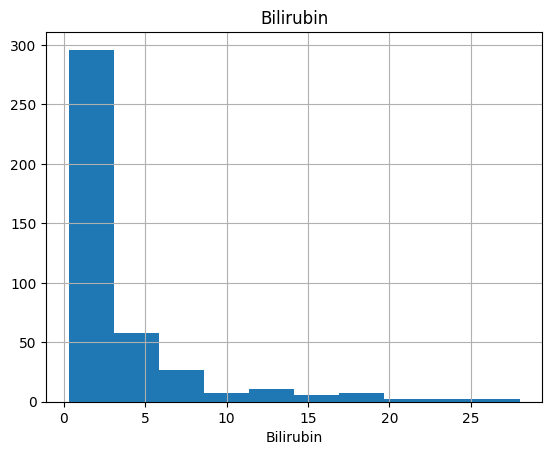

count     284.000000
mean      369.510563
std       231.944545
min       120.000000
5%        188.450000
10%       213.600000
20%       239.000000
30%       258.900000
40%       280.000000
50%       309.500000
60%       337.600000
70%       375.100000
80%       429.000000
90%       560.800000
max      1775.000000
Name: Cholesterol, dtype: float64


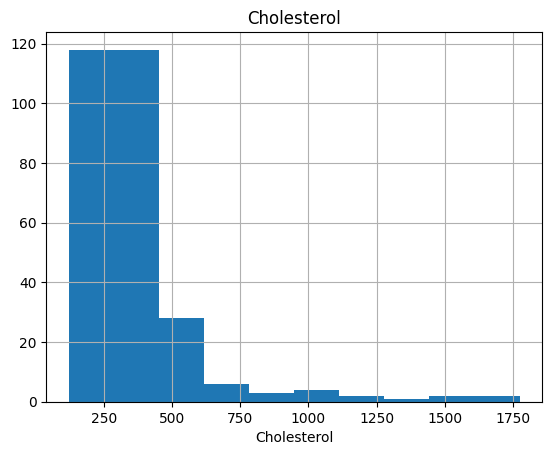

count    418.000000
mean       3.497440
std        0.424972
min        1.960000
5%         2.750000
10%        2.967000
20%        3.154000
30%        3.340000
40%        3.430000
50%        3.530000
60%        3.622000
70%        3.720000
80%        3.836000
90%        4.010000
max        4.640000
Name: Albumin, dtype: float64


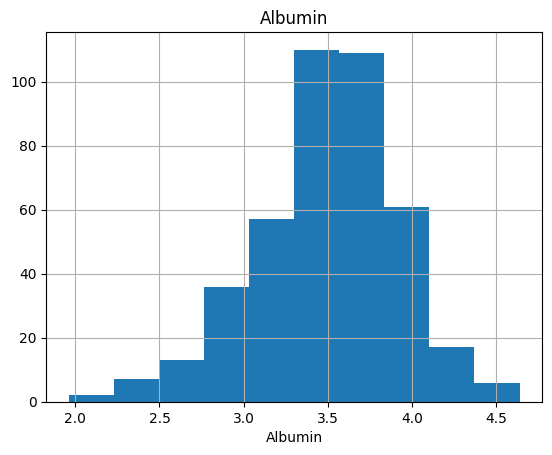

count    310.000000
mean      97.648387
std       85.613920
min        4.000000
5%        17.450000
10%       24.000000
20%       37.800000
30%       48.000000
40%       58.000000
50%       73.000000
60%       84.000000
70%      108.000000
80%      148.400000
90%      208.100000
max      588.000000
Name: Copper, dtype: float64


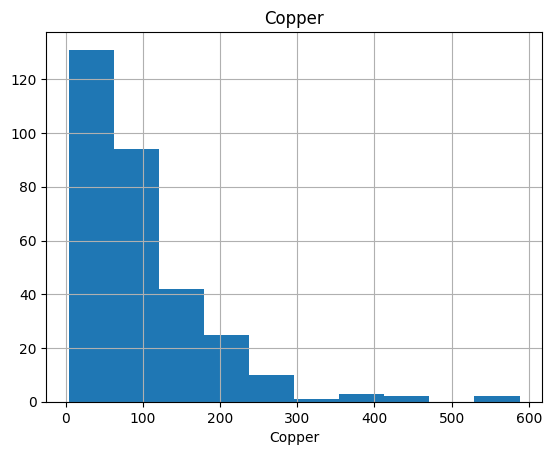

count      312.000000
mean      1982.655769
std       2140.388824
min        289.000000
5%         599.650000
10%        663.000000
20%        798.400000
30%        964.900000
40%       1089.400000
50%       1259.000000
60%       1554.800000
70%       1823.900000
80%       2240.200000
90%       3826.400000
max      13862.400000
Name: Alk_Phos, dtype: float64


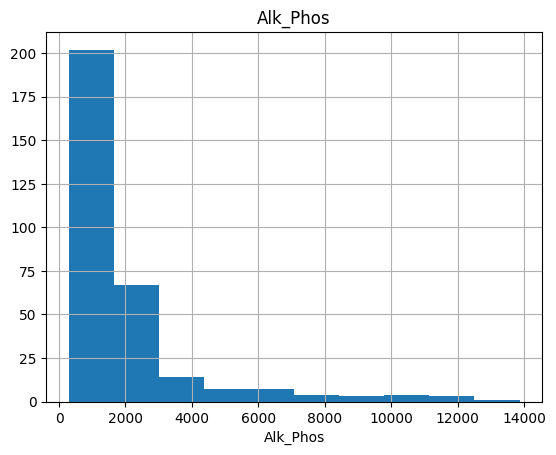

count    312.000000
mean     122.556346
std       56.699525
min       26.350000
5%        54.250000
10%       60.450000
20%       74.400000
30%       86.800000
40%       98.400000
50%      114.700000
60%      127.100000
70%      139.850000
80%      165.850000
90%      196.465000
max      457.250000
Name: SGOT, dtype: float64


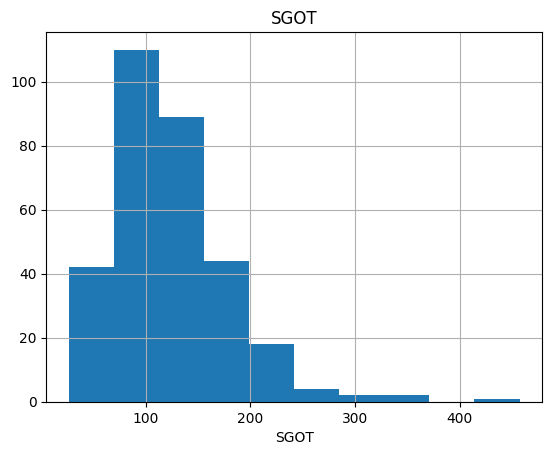

count    282.000000
mean     124.702128
std       65.148639
min       33.000000
5%        56.000000
10%       63.100000
20%       78.000000
30%       89.000000
40%       99.000000
50%      108.000000
60%      121.600000
70%      140.000000
80%      162.800000
90%      195.000000
max      598.000000
Name: Tryglicerides, dtype: float64


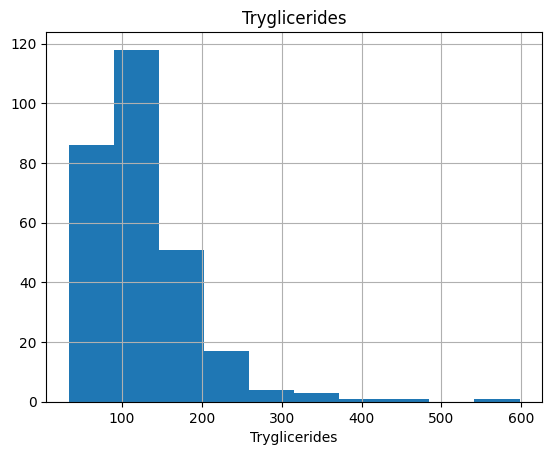

count    407.000000
mean     257.024570
std       98.325585
min       62.000000
5%       114.900000
10%      138.200000
20%      166.200000
30%      203.000000
40%      226.000000
50%      251.000000
60%      272.200000
70%      302.200000
80%      335.000000
90%      386.200000
max      721.000000
Name: Platelets, dtype: float64


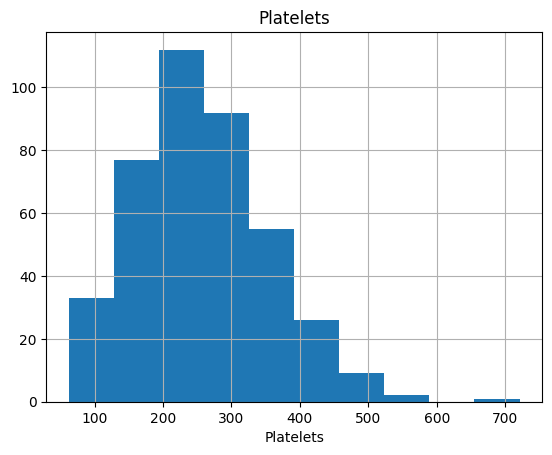

count    416.000000
mean      10.731731
std        1.022000
min        9.000000
5%         9.600000
10%        9.800000
20%        9.900000
30%       10.100000
40%       10.400000
50%       10.600000
60%       10.800000
70%       11.000000
80%       11.300000
90%       12.000000
max       18.000000
Name: Prothrombin, dtype: float64


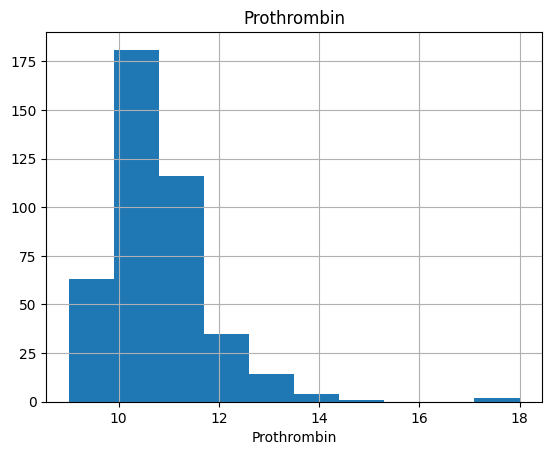

In [ ]:
for col in num_cols:
    num_s(dfc, col, plot="True")

####Mean of Target variable by categorical variables


In [ ]:
def target_summary_with_cat(dataframe, target, categorical_col):
    print(categorical_col)
    print(pd.DataFrame({"TARGET_MEAN":dataframe.groupby(categorical_col)[target].mean(),
                        "Count":dataframe.groupby(categorical_col)[target].count(),
                        "Ratio":100* dataframe[categorical_col].value_counts()/ dataframe.shape[0]}))

In [ ]:
for col in cat_cols:
    target_summary_with_cat(dfc, "Stage", col)
    print("\n")

Status
    TARGET_MEAN  Count      Ratio
C      2.773913    230  55.502392
CL     3.200000     25   5.980861
D      3.363057    157  38.516746


Drug
                 TARGET_MEAN  Count      Ratio
D-penicillamine     2.974684    158  37.799043
Placebo             3.090909    154  36.842105


Sex
   TARGET_MEAN  Count      Ratio
F     3.019022    368  89.473684
M     3.068182     44  10.526316


Ascites
   TARGET_MEAN  Count      Ratio
N     2.968750    288  68.899522
Y     3.791667     24   5.741627


Hepatomegaly
   TARGET_MEAN  Count      Ratio
N     2.611842    152  36.363636
Y     3.431250    160  38.277512


Spiders
   TARGET_MEAN  Count      Ratio
N     2.869369    222  53.110048
Y     3.433333     90  21.531100


Edema
   TARGET_MEAN  Count      Ratio
N     2.936782    348  84.688995
S     3.386364     44  10.526316
Y     3.750000     20   4.784689


Stage
     TARGET_MEAN  Count      Ratio
1.0          1.0     21   5.023923
2.0          2.0     92  22.009569
3.0          3.0   

####Mean of numerical variables by target variable

In [ ]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col:"mean"}))

In [ ]:
for col in num_cols:
    target_summary_with_num(dfc, "Stage", col)
    print("\n")

            N_Days
Stage             
1.0    2654.809524
2.0    2389.836957
3.0    1997.451613
4.0    1420.250000


             Age
Stage           
1.0    47.000000
2.0    49.478261
3.0    48.974194
4.0    53.812500


       Bilirubin
Stage           
1.0     1.361905
2.0     2.453261
3.0     2.825806
4.0     4.427083


       Cholesterol
Stage             
1.0     267.846154
2.0     353.180328
3.0     415.852174
4.0     337.810526


        Albumin
Stage          
1.0    3.705238
2.0    3.607065
3.0    3.592387
4.0    3.302431


           Copper
Stage            
1.0     62.812500
2.0     68.030303
3.0     92.075000
4.0    127.101852


          Alk_Phos
Stage             
1.0    1694.212500
2.0    1816.907463
3.0    2082.128333
4.0    2017.366972


             SGOT
Stage            
1.0     84.460000
2.0    115.562388
3.0    124.326750
4.0    130.498440


       Tryglicerides
Stage               
1.0        90.846154
2.0       113.950820
3.0       130.734513
4.0       129.063158


####Outlier Analysis

In [ ]:

def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1=dataframe[col_name].quantile(q1)
    quartile3=dataframe[col_name].quantile(q3)
    interquantile_range= quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [ ]:
#function returns True if there are outliers
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit)].any(axis=None):
        return True
    else:
        return False

In [ ]:
#Fo loop and If Condition statement to determine outliers in numerical columns
for col in num_cols:
    if col != "Stage":
        print(col, check_outlier(dfc,col))

N_Days False
Age False
Bilirubin False
Cholesterol True
Albumin False
Copper False
Alk_Phos False
SGOT False
Tryglicerides True
Platelets False
Prothrombin True
